In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd

import datasets

In [11]:
data_no_source = pd.read_csv("spectrum_no_source.csv")
data_1 = pd.read_csv("spectrum_1.csv")

function to add counts from channel A and B

In [12]:
def add_counts(dataset_1, dataset_2):
    total_counts = []
    
    for i, j in zip(dataset_1, dataset_2):
        total_counts.append(i + j)
        
    return total_counts
        

function to focus spectrum on peak energy

In [13]:
def adjust(dataset_1, dataset_2):
    x_data = []
    y_data = []
    
    for i, j in zip(dataset_1, dataset_2):
        if i > 22 and i < 50:
            x_data.append(i)
            y_data.append(j)
            
    return x_data, y_data

split datasets into lists

In [14]:
pulseheights = data_1["pulseheight"]
counts_A = data_1["counts_ch_A"]
counts_B = data_1["counts_ch_B"]
counts_total = add_counts(counts_A, counts_B)

pulseheights_no_source = data_no_source["pulseheight"]
counts_no_source_A = data_no_source["counts_ch_A"]
counts_no_source_B = data_no_source["counts_ch_B"]
counts_total_no_source = add_counts(counts_no_source_A, counts_no_source_B)

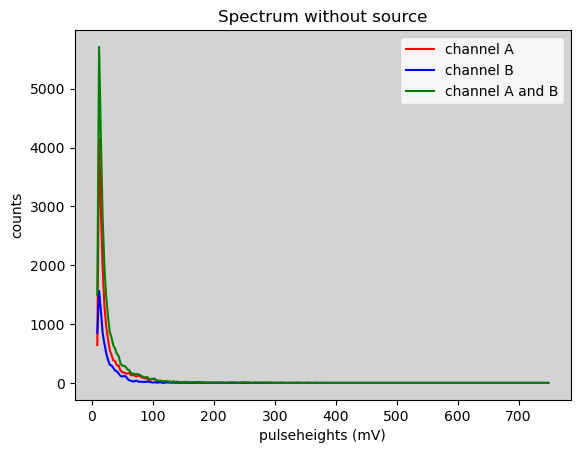

In [15]:

plt.plot(pulseheights_no_source, counts_no_source_A, color ='red', label = 'channel A')
plt.plot(pulseheights, counts_no_source_B, color = 'blue', label = 'channel B')
plt.plot(pulseheights, counts_total_no_source, color = 'green', label = 'channel A and B')
plt.gca().set_facecolor('lightgrey')
plt.title("Spectrum without source")
plt.legend(loc = 'upper right')
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

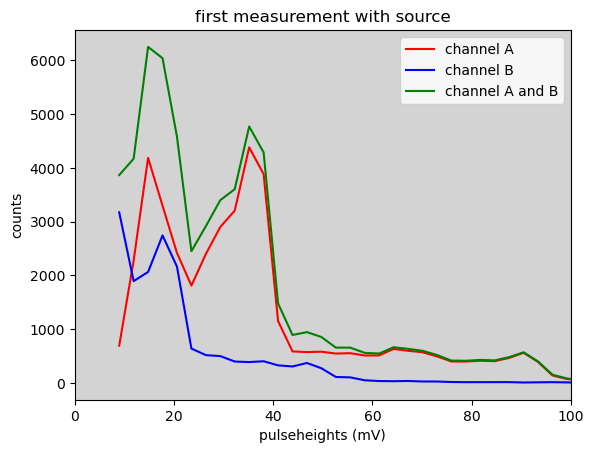

In [16]:
plt.plot(pulseheights, counts_A, color ='red', label = 'channel A')
plt.plot(pulseheights, counts_B, color = 'blue', label = 'channel B')
plt.plot(pulseheights, counts_total, color = 'green', label = "channel A and B")
plt.gca().set_facecolor('lightgrey')
plt.title("first measurement with source")
plt.legend(loc = 'upper right')
plt.xlim(0, 100)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

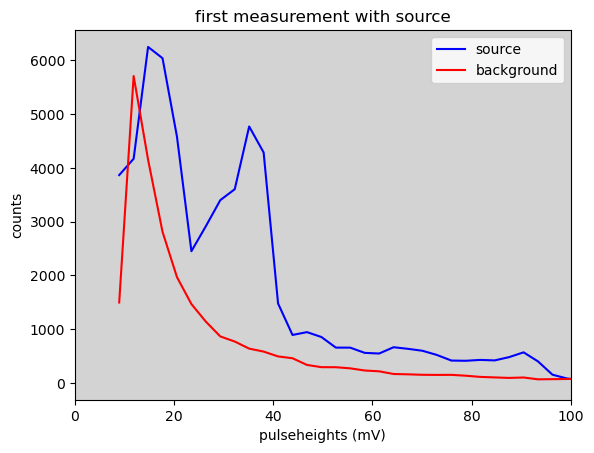

In [17]:

plt.plot(pulseheights, counts_total, color = 'blue', label = "source")
plt.plot(pulseheights_no_source, counts_total_no_source, color = 'red', label = 'background')
plt.gca().set_facecolor('lightgrey')
plt.title("first measurement with source")
plt.legend(loc = 'upper right')
plt.xlim(0, 100)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()

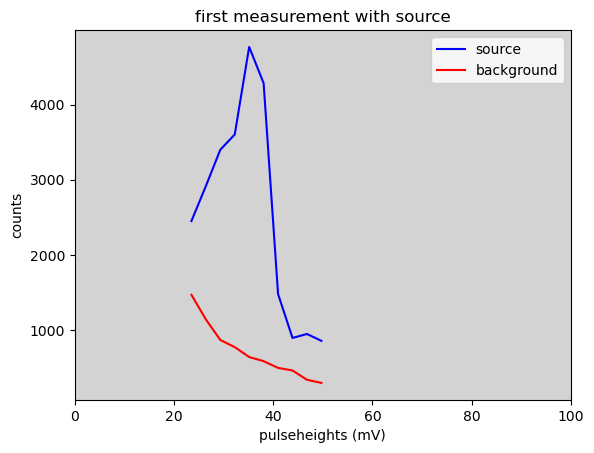

In [18]:
pulseheights_cut, counts_cut = adjust(pulseheights, counts_total)
pulseheights_cut_no_source, counts_cut_no_source = adjust(pulseheights_no_source, counts_total_no_source)

plt.plot(pulseheights_cut, counts_cut, color = 'blue', label = "source")
plt.plot(pulseheights_cut_no_source, counts_cut_no_source, color = 'red', label = 'background')
plt.gca().set_facecolor('lightgrey')
plt.title("first measurement with source")
plt.legend(loc = 'upper right')
plt.xlim(0, 100)
plt.ylabel("counts")
plt.xlabel("pulseheights (mV)")
plt.show()